# Data Science & Business Analytics Task 1
*Author : PRAVEEN GALAPPA*

# Data Preparation
Data preparation is the initial step after we get our hands on the dataset. Then we need to import some of the libraries as python library. These libraries are a set of functions and methods that enables us to perform multiple actions without writing code

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Reading data from remote link


In [6]:
url = "http://bit.ly/w-data"
task1 = pd.read_csv(url)
print("Data has been imported successfully")

Data has been imported successfully


# Data Exploration
Here the users explore a broad data collection to discover initial trends, features and points of interest in an unstructured way.
Data exploration can be used as a combination of manual methods and automated tools such as visualizations of results, maps, and initial reports.

In [7]:
task1.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
task1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Check for Null Value

In [9]:
task1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
# Visualization

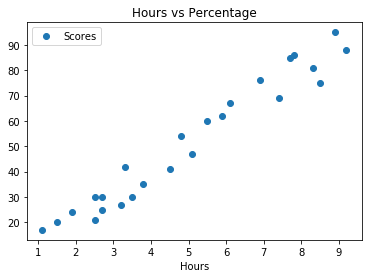

In [11]:
task1.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.show()

In [28]:
task1.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [32]:
task1.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [39]:
import seaborn as sns

In [45]:
corr = task1[['Hours','Scores']].corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


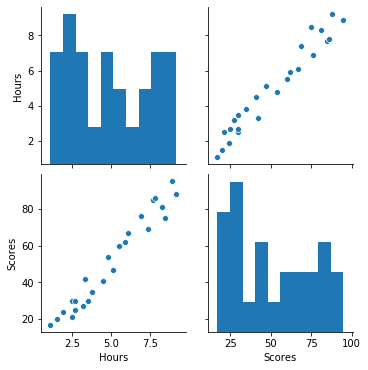

In [47]:
sns.pairplot(task1)

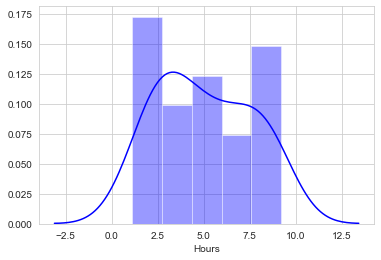

In [54]:
sns.set_style('whitegrid') 
sns.distplot(task1['Hours'],kde =True, color ='blue', bins = 5)

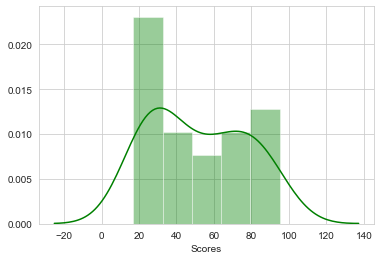

In [55]:
sns.set_style('whitegrid') 
sns.distplot(task1['Scores'],kde =True, color ='green', bins = 5)

# Splitting the data into test and train set

In [18]:
# here we divide the data into attributes and labels
X = task1.iloc[:, :-1].values  
y = task1.iloc[:, 1].values  

In [19]:
# here we split the data into train and test dataset

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Using Algorithm

In [21]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plotting for the test data

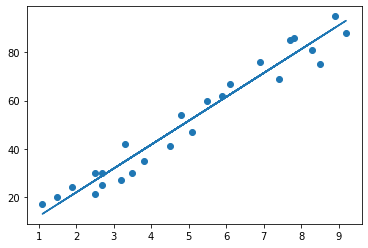

In [23]:
graph = reg.coef_*X+reg.intercept_
plt.scatter(X, y)
plt.plot(X, graph);
plt.show()

# Analyzing and prdecting

In [25]:
#Predicting the scores
y_pred = reg.predict(X_test)

In [27]:
# Comparing Actual vs Predicted values
Actual_vs_predicted= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Actual_vs_predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [63]:
hours = 9.25
hours = np.array(9.25)
hours = hours.reshape(-1,1)
reg.predict(hours)

array([93.69173249])

# Evaluating the model

In [64]:
from sklearn import metrics  

In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
